Çıkarılması önerilen öznitelikler: ['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']


## 🚀 XGBoost ile Meme Kanseri Teşhisi (Wisconsin Diagnostic Data Set)

In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# ---------------------- 1. Veri Seti Yükleme ve Sütun Adları ----------------------
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv("wdbc.csv", names=columns, header=None)

# ---------------------- 2. Etiket Kodlama ----------------------
df["diagnosis"] = df["diagnosis"].map({'B': 0, 'M': 1})


In [3]:
# ---------------------- 3. Korelasyonu Yüksek Özellikleri Bulma ----------------------
# Korelasyon matrisini hesaplayalım
korelasyon_matrix = df.iloc[:, 2:].corr().abs()  # Hedef ve ID hariç sayısal sütunlar

# Üst üçgeni almak için
upper = korelasyon_matrix.where(np.triu(np.ones(korelasyon_matrix.shape), k=1).astype(bool))

# Korelasyonu yüksek olan özellikleri çıkarma
yuksek_korelasyon_ozellikler = [column for column in upper.columns if any(upper[column] > 0.9)]

# Yüksek korelasyonlu özellikleri yazdırma
print("Yüksek Korelasyonlu Özellikler:", yuksek_korelasyon_ozellikler)

Yüksek Korelasyonlu Özellikler: ['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']


In [4]:

# Giriş ve hedef değişkeni ayır
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test kümeleri
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

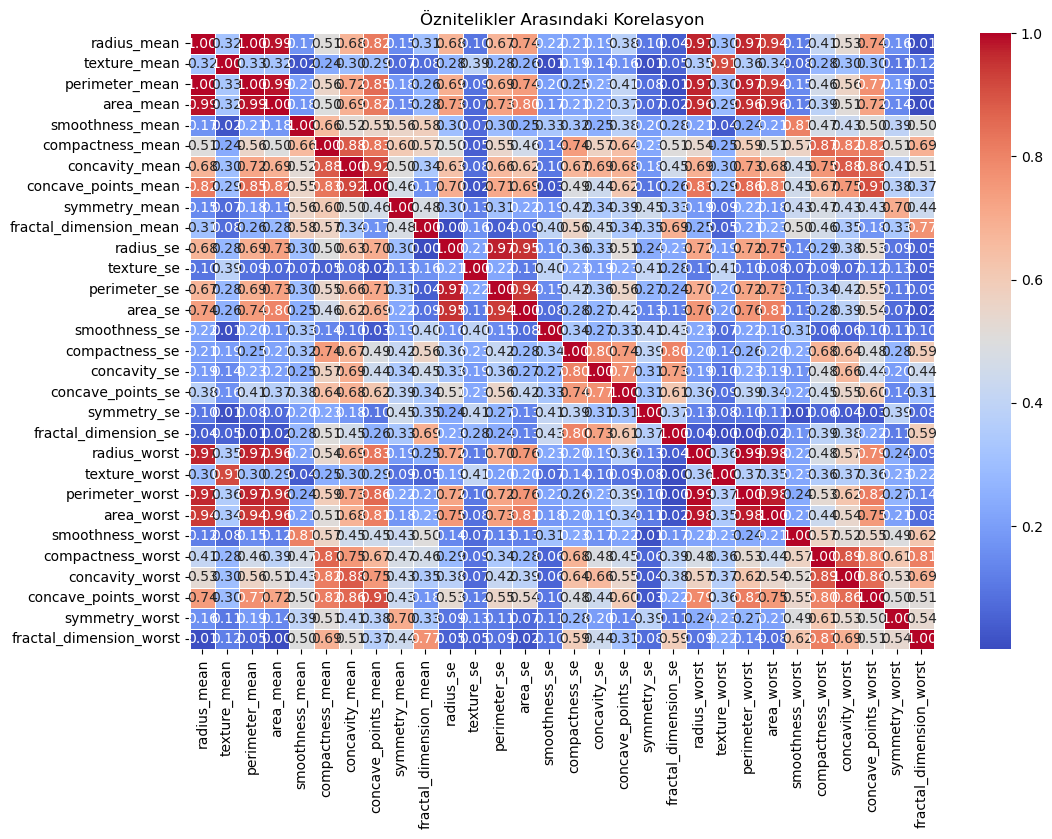

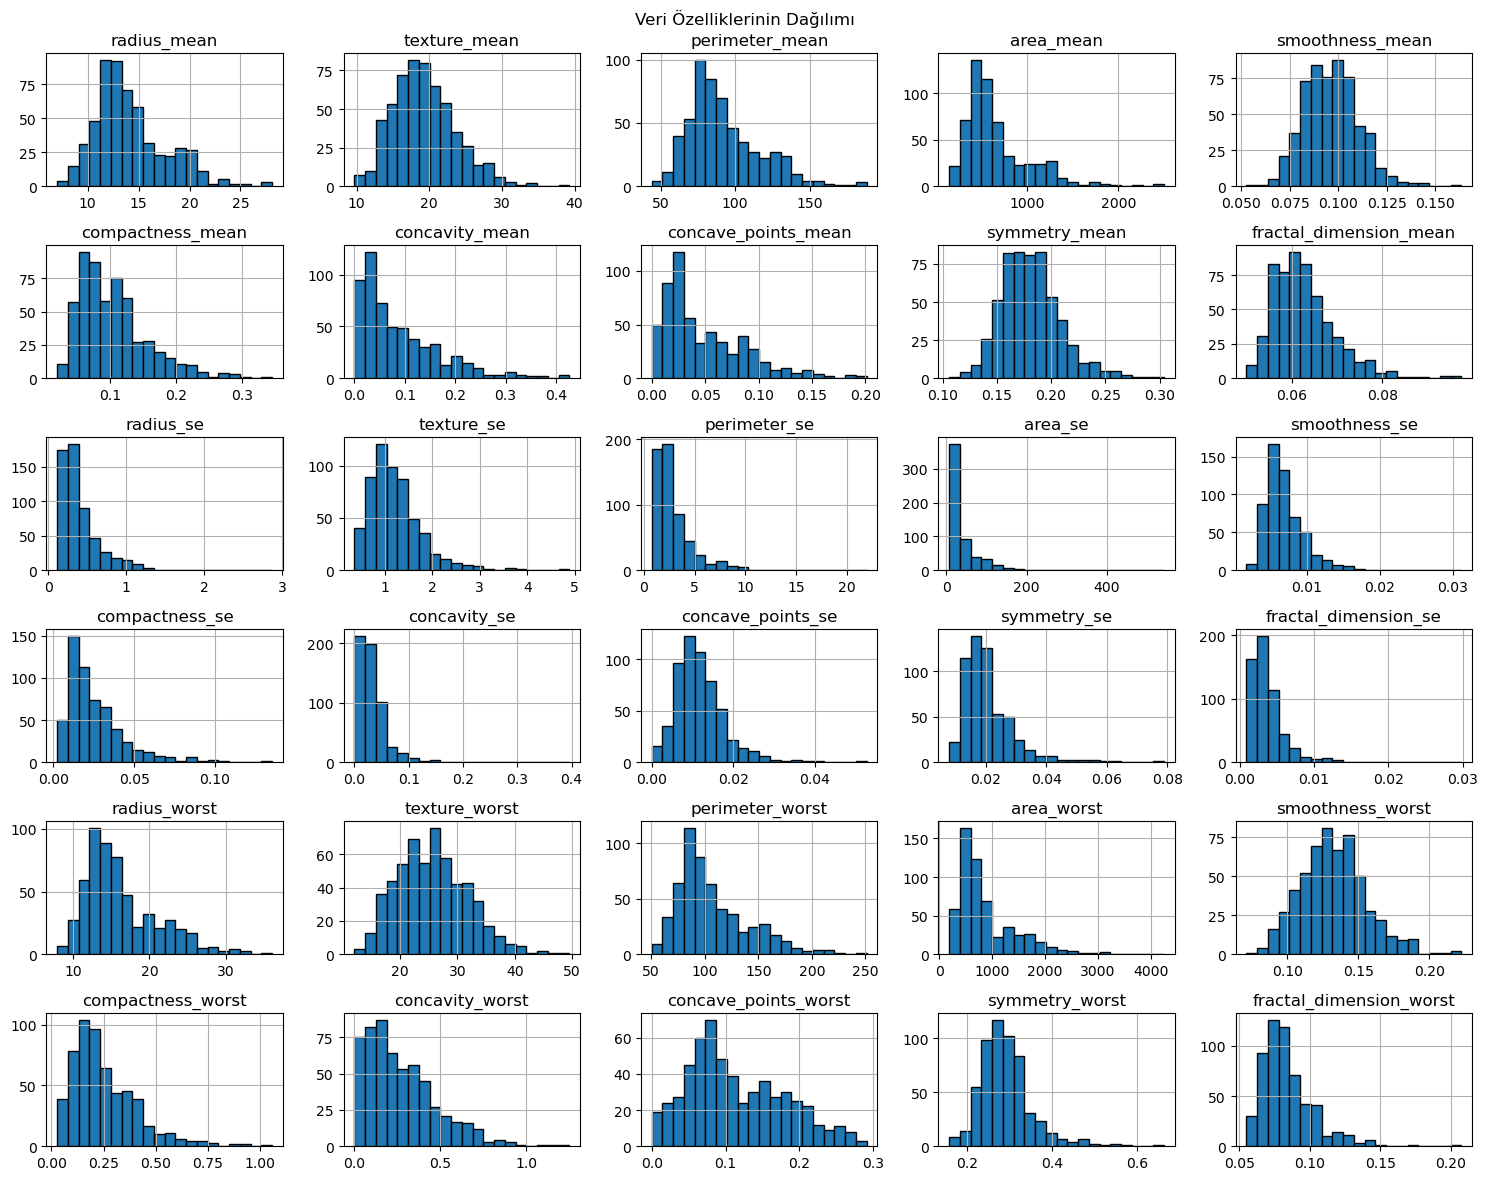

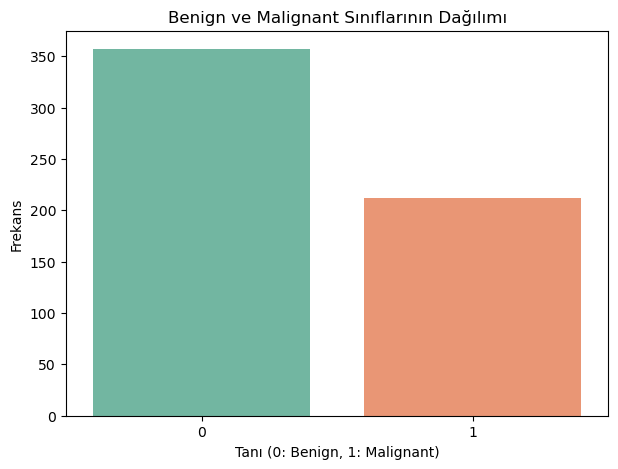

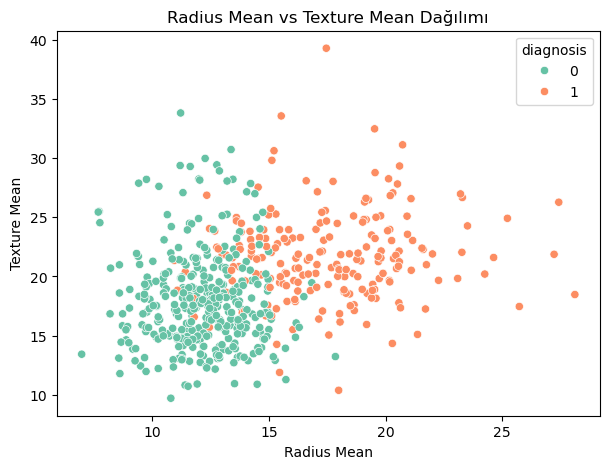

In [13]:

# ---------------------- 1. Korelasyon Matrisini Görselleştir ----------------------
# Korelasyon matrisini hesaplayalım
korelasyon_matrix = df.iloc[:, 2:].corr().abs()  # ID ve hedef hariç sayısal sütunlar

# Heatmap ile korelasyonu görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(korelasyon_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Öznitelikler Arasındaki Korelasyon")
plt.show()

# ---------------------- 2. Veri Dağılımını Görselleştir ----------------------
# Her özelliğin histogramını çizelim
df.iloc[:, 2:].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Veri Özelliklerinin Dağılımı")
plt.tight_layout()
plt.show()


# ---------------------- 3. Sınıflara Göre Dağılım ----------------------
# Benign ve Malignant sınıflarının dağılımını çizelim
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', hue='diagnosis',data=df, palette='Set2', legend=False)
plt.title("Benign ve Malignant Sınıflarının Dağılımı")
plt.xlabel("Tanı (0: Benign, 1: Malignant)")
plt.ylabel("Frekans")
plt.show()

# ---------------------- 4. Özniteliklerin İki Boyutlu Dağılımı ----------------------
# İki özellik arasındaki dağılımı scatter plot olarak gösterelim
plt.figure(figsize=(7, 5))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', palette='Set2', data=df)
plt.title("Radius Mean vs Texture Mean Dağılımı")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()


In [16]:
# XGBoost modelini oluştur ve eğit
model = XGBClassifier( eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
# Tahmin yap ve metrikleri hesapla
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("✅ Doğruluk:", accuracy_score(y_test, y_pred))
print("🎯 ROC AUC:", roc_auc_score(y_test, y_prob))
print("\n📋 Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

✅ Doğruluk: 0.956140350877193
🎯 ROC AUC: 0.9950867998689814

📋 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



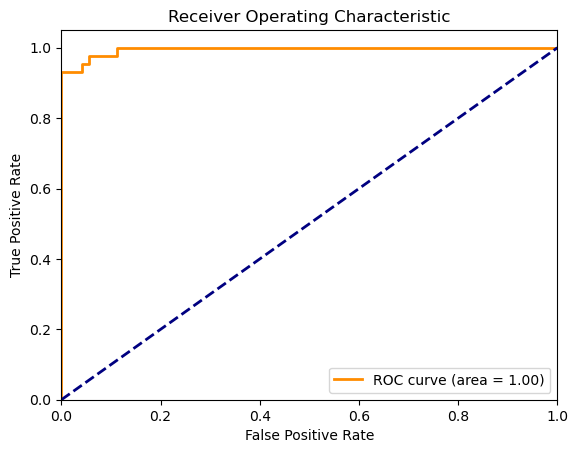

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


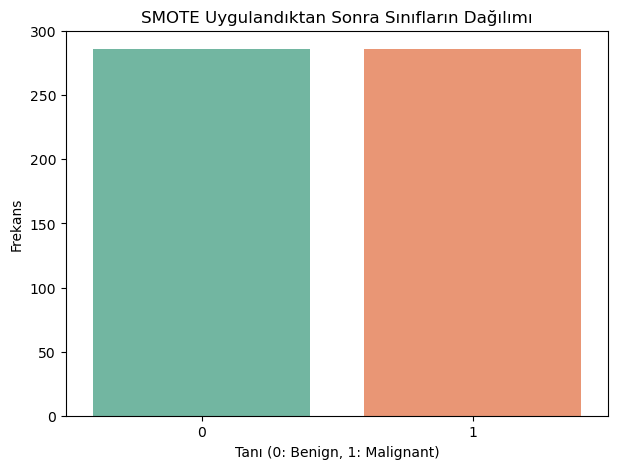

In [20]:
from imblearn.over_sampling import SMOTE
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # 4 çekirdek kullansın, kendi sisteminize göre değiştirebilirsiniz.
;
# SMOTE uygulaması
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Yeni eğitim setinin sınıf dağılımı
# Sınıf dağılımını görselleştirelim
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train_res, hue=y_train_res, palette='Set2', legend=False)
plt.title("SMOTE Uygulandıktan Sonra Sınıfların Dağılımı")
plt.xlabel("Tanı (0: Benign, 1: Malignant)")
plt.ylabel("Frekans")
plt.show()
